# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [3]:
cols_names=['class', 'Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines', 'Proline']
wine_df = pd.read_csv('wine.data', names = cols_names)
wine_df.head(2)

class  Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23       1.71  2.43               15.6        127   
1      1    13.20       1.78  2.14               11.2        100   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   

   Color_intensity   Hue  0D280_0D315_of_diluted_wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050

# EDA

In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malicacid                     178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  0D280_0D315_of_diluted_wines  178 non-null    float64
 13  Proli

In [26]:
wine_df.isnull().any()

class                           False
Alcohol                         False
Malicacid                       False
Ash                             False
Alcalinity_of_ash               False
Magnesium                       False
Total_phenols                   False
Flavanoids                      False
Nonflavanoid_phenols            False
Proanthocyanins                 False
Color_intensity                 False
Hue                             False
0D280_0D315_of_diluted_wines    False
Proline                         False
dtype: bool

### Note: There are no missing values in the dataset

In [25]:
wine_df.describe()

class     Alcohol   Malicacid         Ash  Alcalinity_of_ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total_phenols  Flavanoids  Nonflavanoid_phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       Proanthocyanins  Color_intensity         Hue  \
count       178.000000       178.000000  178.000000   
mean          1.590899         5.058090    0.957449   
std           0.572359         2.318286    0.228572   
min           0.410000         1.280000    0.480000   
25%           1.250000         3.220000    0.782500   
50%           1.555000         4.690000    0.965000   
75%           1.950000         6.200000    1.120000   
max           3.580000        13.000000    1.710000   

       0D280_0D315_of_diluted_wines      Proline  
count                    178.000000   178.000000  
mean                       2.611685   746.893258  
std                        0.709990   314.907474  
min                        1.270000   278.000000  
25%                        1.937500   500.500000  
50%                        2.780000   673.500000  
75%                        3.170000   985.000000  
max                        4.000000  1680.000000

In [27]:
wine_df.nunique()

class                             3
Alcohol                         126
Malicacid                       133
Ash                              79
Alcalinity_of_ash                63
Magnesium                        53
Total_phenols                    97
Flavanoids                      132
Nonflavanoid_phenols             39
Proanthocyanins                 101
Color_intensity                 132
Hue                              78
0D280_0D315_of_diluted_wines    122
Proline                         121
dtype: int64

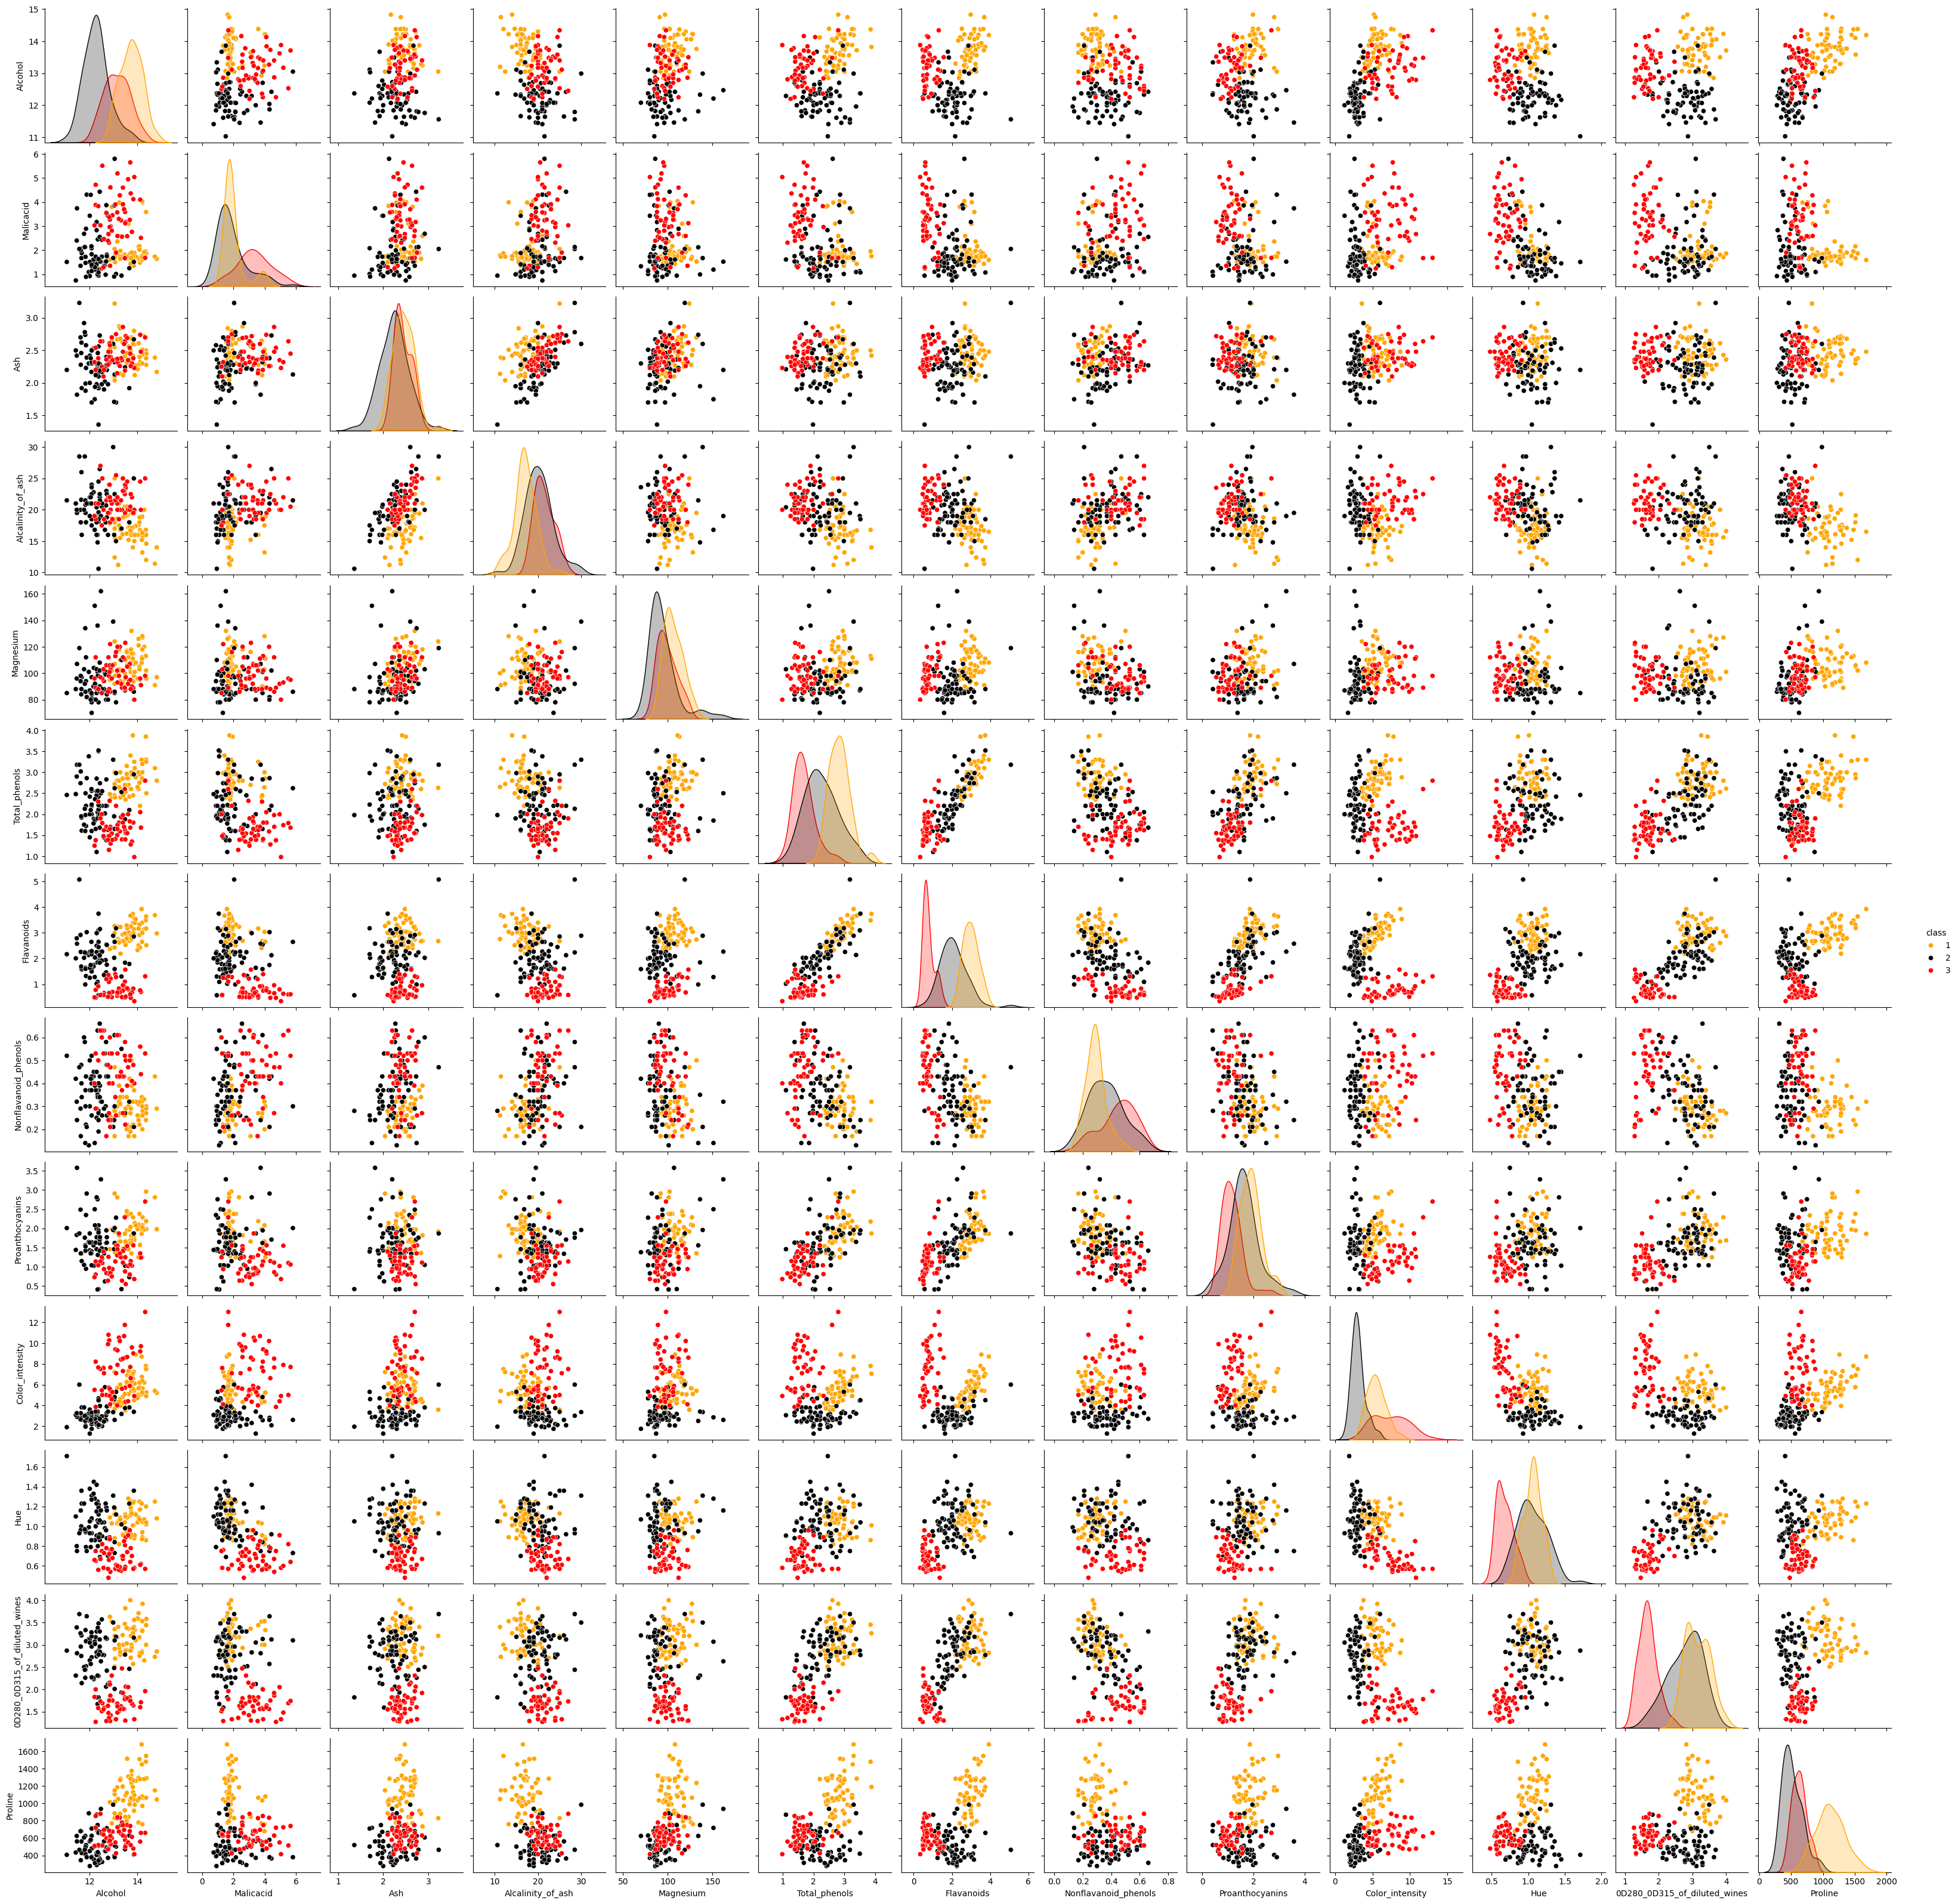

In [7]:
sns.pairplot(data = wine_df, hue = 'class', palette=['orange', 'k', 'red'])

### Note: according to the scatter plots each feature (in first row), it can be shown that each feature can be split to three classes.



### The density in each class:

<Axes: xlabel='class', ylabel='count'>

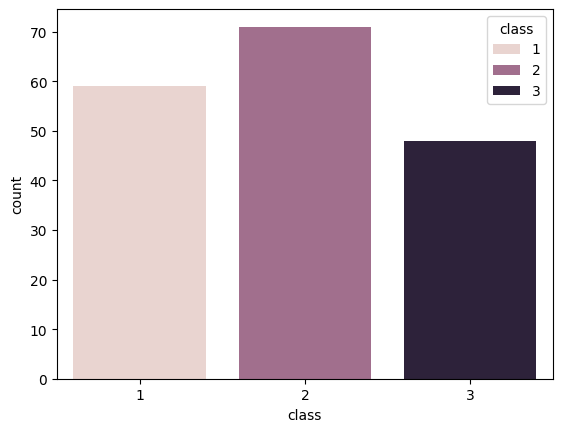

In [36]:
sns.countplot(x = 'class', data = wine_df, hue = 'class')

# Measure the correlation between numerical and categorical variables
### Note: beacause of the target is a categorical variable and all the feachers are numerical variables, we should use the f_oneway function from scipy library, that give us the p-value.


In [28]:
from scipy.stats import f_oneway

In [29]:
for column in wine_df.columns[1:]:
 cat_grouplist = wine_df.groupby('class')[column].apply(list)
 result = f_oneway(*cat_grouplist)
 print('P-value for', column, 'is: ', result[1])

P-value for Alcohol is:  3.319503795619638e-36
P-value for Malicacid is:  4.127228798041835e-14
P-value for Ash is:  4.149967974793234e-06
P-value for Alcalinity_of_ash is:  9.444472938826805e-14
P-value for Magnesium is:  8.963395439251026e-06
P-value for Total_phenols is:  2.137670015438603e-28
P-value for Flavanoids is:  3.598585830713661e-50
P-value for Nonflavanoid_phenols is:  3.8880409004789327e-11
P-value for Proanthocyanins is:  5.125358737546697e-12
P-value for Color_intensity is:  1.1620080219276148e-33
P-value for Hue is:  5.91766221636207e-30
P-value for 0D280_0D315_of_diluted_wines is:  1.393104956942888e-44
P-value for Proline is:  5.783168356105483e-47


### Note: as the outputs of the P-value are almost zero, then, the H0 was rejected. This means each features are correlated with target.

### According to the all of the features are numerical variable, The correlation of them are calculated by corr():

<Axes: >

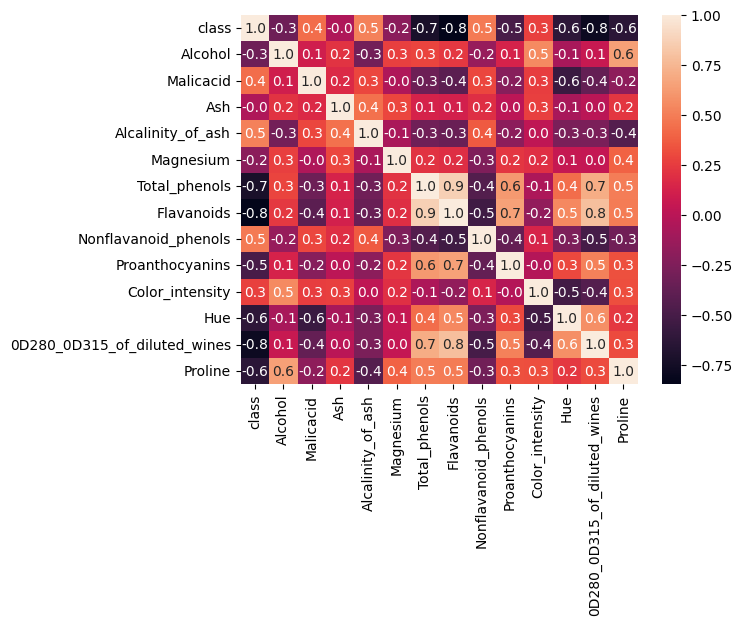

In [30]:
corr_matrix = wine_df[1:].corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".1f")

### The denisty of features in each class:

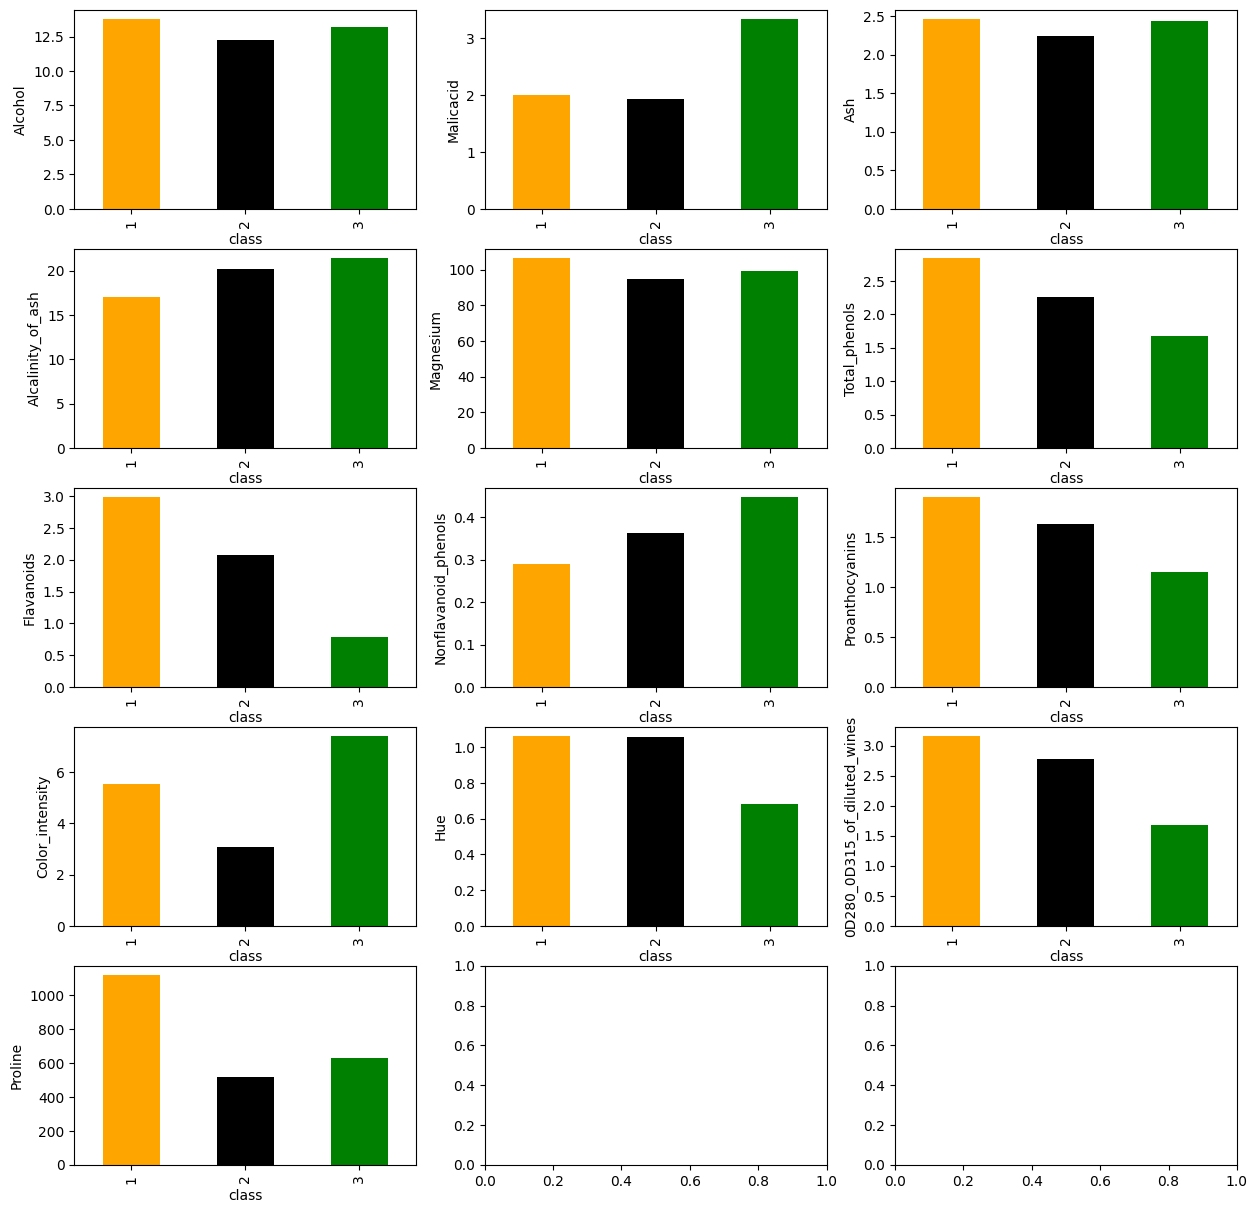

In [106]:
fig, axes = plt.subplots(5,3, figsize = (15, 15))
axe = axes.ravel()
for i, column in enumerate(wine_df.columns[1:]):
    wine_df.groupby('class')[column].mean().plot(kind = 'bar', color=['orange', 'k', 'green'], ax=axe[i])
    axe[i].set_ylabel(column)

### The distribution curve of each feature:

array([[<Axes: title={'center': 'class'}>,
        <Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malicacid'}>,
        <Axes: title={'center': 'Ash'}>],
       [<Axes: title={'center': 'Alcalinity_of_ash'}>,
        <Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Total_phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>],
       [<Axes: title={'center': 'Nonflavanoid_phenols'}>,
        <Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color_intensity'}>,
        <Axes: title={'center': 'Hue'}>],
       [<Axes: title={'center': '0D280_0D315_of_diluted_wines'}>,
        <Axes: title={'center': 'Proline'}>, <Axes: >, <Axes: >]],
      dtype=object)

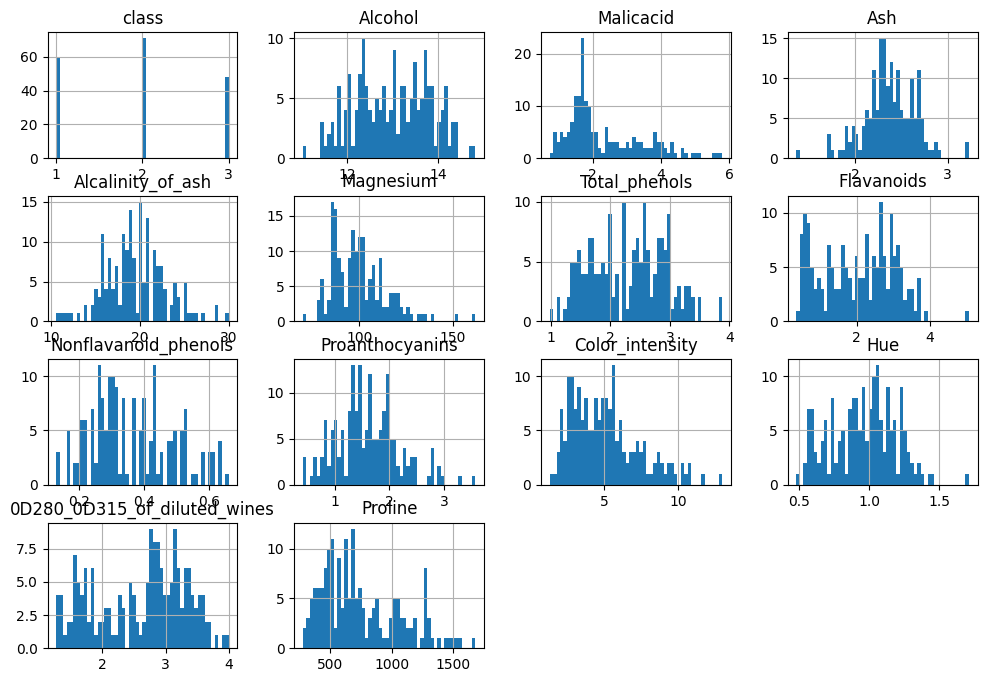

In [41]:
wine_df.hist(bins=50, figsize=(12, 8))

### Note: the results show the distribution curves are not normal.

# Split features and target

In [31]:
features = wine_df.drop('class', axis = 1)
target = wine_df["class"]

# Split test and train sets

In [32]:
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=10)

# Training
 ### Note: to train the model, it has been used soft max, because the target has three class.

In [35]:
from sklearn.linear_model import LogisticRegression
lg_softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
lg_softmax_model.fit(features_train, target_train)

C:\Users\Radin\Desktop\ML-Basic\ML_Basic_venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, multi_class='multinomial')

In [36]:
lg_softmax_model.coef_

array([[-0.71720404,  0.28055974,  0.24625675, -0.58658116,  0.0646501 ,
         0.24919159,  0.68691748,  0.04657516,  0.23174255, -0.39329953,
        -0.0515896 ,  0.41502592,  0.01623033],
       [ 1.29486027, -0.83700084, -0.1836255 ,  0.21689795, -0.07613729,
         0.55325413,  0.96530969, -0.05041355,  0.40183315, -2.02914124,
         0.5087538 ,  0.99258152, -0.01092072],
       [-0.57765622,  0.5564411 , -0.06263125,  0.36968321,  0.01148719,
        -0.80244572, -1.65222717,  0.00383839, -0.6335757 ,  2.42244077,
        -0.45716419, -1.40760744, -0.0053096 ]])

In [37]:
lg_softmax_model.intercept_

array([-0.11208301,  0.21488837, -0.10280536])

# Evaluation

 ### Use score method to get accuracy of model

In [46]:
score_train = lg_softmax_model.score(features_train, target_train)
print('The accuracy is:', score_train)

The accuracy is: 0.9774436090225563


In [47]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [48]:
predicted_train_class = lg_softmax_model.predict(features_train)

In [49]:
print(accuracy_score(target_train, predicted_train_class))

0.9774436090225563


# Test the model

 ### Use score method to get accuracy of model by test data

In [40]:
score_test = lg_softmax_model.score(features_test, target_test)
print('The accuracy is:', score_test)

The accuracy is: 0.8444444444444444


In [42]:
print(lg_softmax_model.predict(features_test[0:5]))
print(lg_softmax_model.predict_proba(features_test[0:5]))

[1 2 1 2 1]
[[9.94939544e-01 5.04580270e-03 1.46528672e-05]
 [1.16811638e-06 9.99997720e-01 1.11194351e-06]
 [9.90078822e-01 9.88345398e-03 3.77240829e-05]
 [1.64054697e-06 9.99998142e-01 2.17629878e-07]
 [9.99907434e-01 6.29690508e-05 2.95965704e-05]]


In [51]:
predicted_test_class = lg_softmax_model.predict(features_test)

### Confusion Matrix

In [53]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(target_test, predicted_test_class))
print(classification_report(target_test, predicted_test_class))

[[12  1  0]
 [ 4 17  2]
 [ 0  0  9]]
              precision    recall  f1-score   support

           1       0.75      0.92      0.83        13
           2       0.94      0.74      0.83        23
           3       0.82      1.00      0.90         9

    accuracy                           0.84        45
   macro avg       0.84      0.89      0.85        45
weighted avg       0.86      0.84      0.84        45



### Nore: not a visually appealing way to view a confusion matrix
### As you can see below, this method produces a more understandable and visually readable confusion matrix using seaborn

Text(0.5, 137.22222222222217, 'Predicted label')

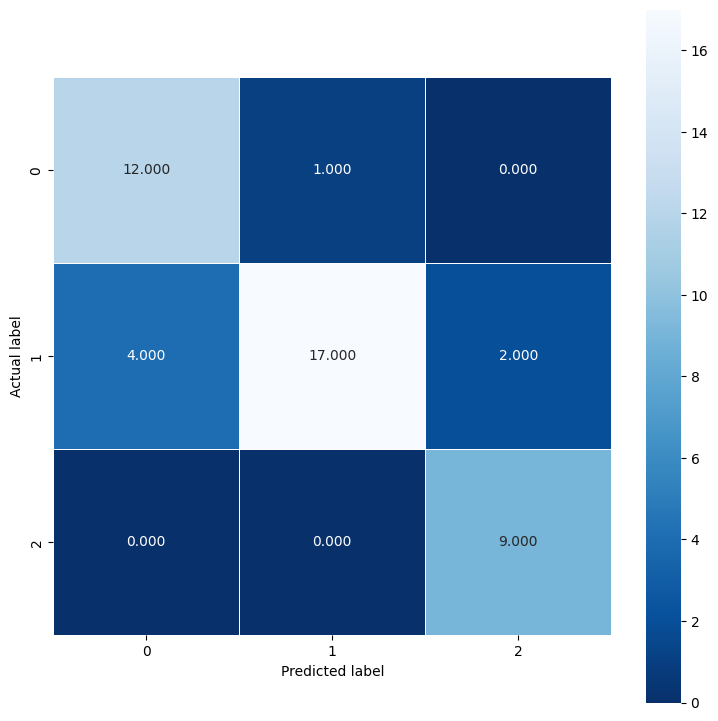

In [54]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# all_sample_title = 'Accuracy Score: {0}'.format(score)
# plt.title(all_sample_title, size = 15)